# Covid data


In [1]:
from ETL.EtlCovid import *
from ETL.EtlElection import *
from ETL.EtlVaccine import *
from Visualization.VizBase import *
from Visualization.VizCovid import *
from Visualization.VizVaccine import *
from Visualization.VizMask import *

In [2]:
#alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

# The Motivations

The Nigerian Igbo word “igwebuike”, which means “there is strength in community.” paraphrases the ideal response 
to the Covid pandemic. To build herd immunity and stop its spread, within and outside borders, a cohesive and 
co-operative front is called for. However, amidst this pandemic, there is a suggestion that the U.S. has never 
been as divided as in recent years.

In a year of presidential elections, the leadership rhetoric and messaging regarding Covid response and behavior, 
as projected by the media, appears to starkly differ along political ideological lines, specifically, Democrat versus 
Republican. Usage of masks, openness to vaccination and a general appreciation of the severity of the pandemic, as 
portrayed to the public, arouses curiosity as to whether the response is truly divided along party lines.

We will also explore if other factors, commonly associated with political affiliation, differentiate the response 
by communities towards US Centers for Disease Control guidelines. Amongst those, employment rates and the urban/rural 
demographic of the voting population, will be considered.

__Question to answer__: Is there a significant correlation between political affiliation and population response to 
the COVID pandemic, and the confirmed case and death rates? 

__Additional analyses__: 
* Did this trend continue during the more recent rise of the Delta variant? 
* Are there other factors that could have affected this correlation? 
* Two prominent ones often mentioned with the political divide are unemployment and the urban/rural demographic.


# Is there an observable correlation between political affiliation  and population response to the COVID pandemic?
## Party affiliation and Covid case trend in Presidential election year of 2020

The basis of this project began with the observations derived from the visualization below. 
The **task** is to determine if there is a significant difference in the rate of rise of Covid cases between 
normalized (per 100K) populations that professes affiliation to one party or another (Republican, Democrat and Other). 
The **data** to be analyzed was the county level Covid confirmed cases, joined with Presidential election data 
from 2016 and 2020.
We differentiate between populations that voted Republican, Democrat or Other. The affiliation was further sectioned 
into those that stayed loyal to a party from 2016 to 2020, in contrast to those that were perhaps more influenced 
by the political messaging and switched loyalties. The number of cases plotted along the y-axis is the seven-day 
rolling average rather than **raw numbers** which can reflect data collection and delay errors.

From the visualization we observed that the rate of rise of the infection was markedly higher, towards the end of 
the first year of the pandemic, in the populations that voted Republican (remained loyal in 2020 or switched from 2016). 

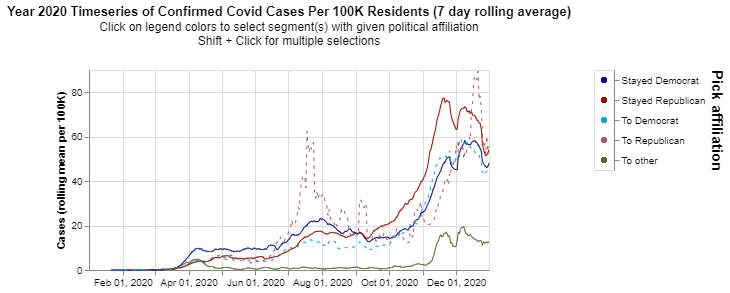

In [3]:
# Get rolling average of cases by segment
case_rolling_df = getRollingCaseAverageSegmentLevel()

# Create the chart
base, make_selector, highlight_segment, radio_select  = createCovidConfirmedTimeseriesChart(case_rolling_df)
selectors, rules, points, tooltip_text  = createTooltip(base, radio_select, case_rolling_df)


# Bring all the layers together with layering and concatenation
( alt.layer(
    highlight_segment, selectors, points,rules, tooltip_text ) | make_selector 
)



## Strength of affiliation and COVID deaths at County level

Does strength of affiliation, as determined by the percentile point change in votes received by a party in 2020 
over 2016, show any correlation to the number of Covid related deaths in that county? 
With the below visual, we compared the counties voting for each party that suffered the most deaths per 100K population.
The scatter plot is divided into four quadrants.
The quadrant to the top right contains counties with most deaths and more percentile point change in votes in favor 
of a party.
By selecting each segment in the dropdown the counties that Stayed Democrat suffered marginally less than those that 
Stayed Republican.

> [Chart Design Credit to NPR](https://www.npr.org/sections/health-shots/2020/11/06/930897912/many-places-hard-hit-by-covid-19-leaned-more-toward-trump-in-2020-than-2016)


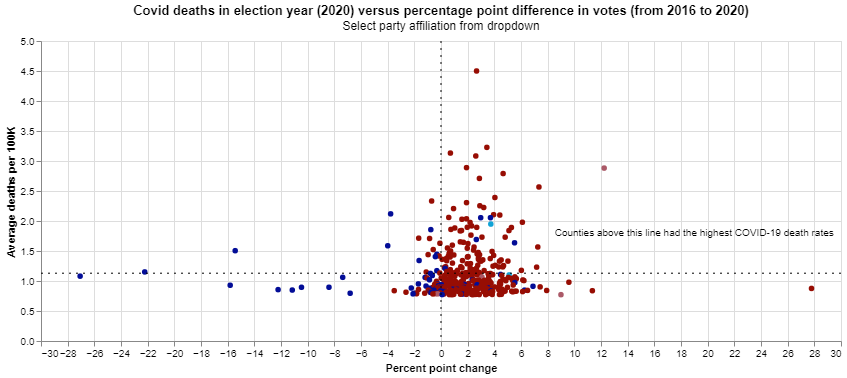

In [4]:
# Display the chart

createPercentPointChangeAvgDeathsChart()

## Affiliation and Vaccine Adoption Rates By State

To allow the user to wield the power to pause and view the rate at which states in the U.S. adopted the Covid 
vaccines after it became available, the below visual offers a slider bar with a duration from first shot as range. 
As Cassie Kozyrkov writes [here](https://towardsdatascience.com/analytics-is-not-storytelling-a1fe61b1ab6c), 
"As an analyst, I’m not here to funnel you towards my opinion. I’m here to help you form your own."
In employing interaction in the below visual (originally seen in static form at this 
[NPR site](https://www.npr.org/2021/06/09/1004430257/theres-a-stark-red-blue-divide-when-it-comes-to-states-vaccination-rates),
we notice clearly that "blue" states surged forward in vaccinations earlier than the red states after about three 
months after its release. 
The size of the bubbles in the chart below is scaled by population of each state.
The X-axis positions each state by the percent of its population with at least one shot (since some vaccines require 
only one shot).

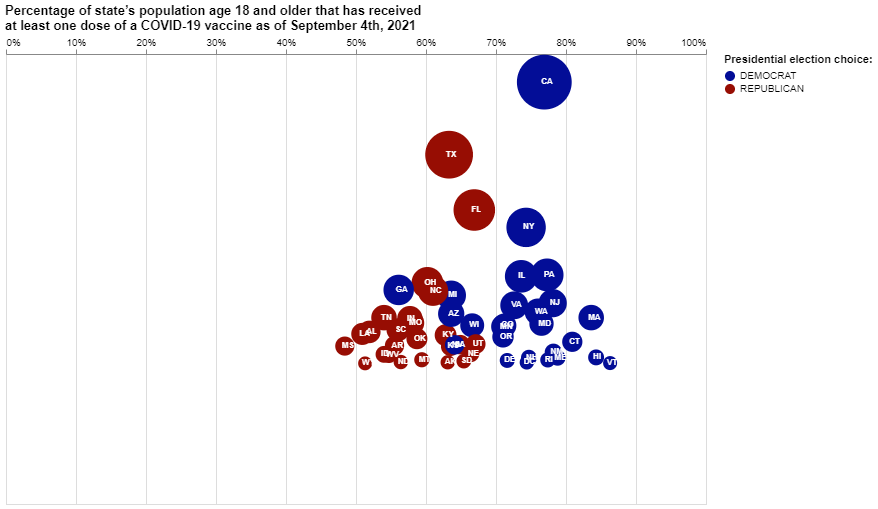

In [5]:
createDailyInteractiveVaccinationChart()


## Vaccinations and the Delta Variant Case Resurgence

The chart below allows for selection of a state in the map to learn about case trend
for the period after the first Delta variant was detected in the US. The US average and per political affiliation 
averages are also plotted for baseline comparison.

Efficacy of the vaccine over time, for this pandemic, can only be measured as time progresses, since we do not have a 
precedent. Mutation of the virus is inevitable and immunity response is constantly being monitored.
The below visualization presents the resurgence in Covid cases that are observed to be rising especially in states with 
low adoption. We compare an individual state's trend with mean trends pertaining to the US, combined mean of states that 
voted Republican and states that voted Democrat. It was noted that the resurgent rising trends were notably seen in 
states such as Louisiana, Missouri, and Florida where the numbers rose well above all the means. These are "red" states. 
Vermont has a high vaccination adoption and a notably lower trend. Most of the states that voted Democrat also have 
trends that initially spiked and later settled closer to their mean.

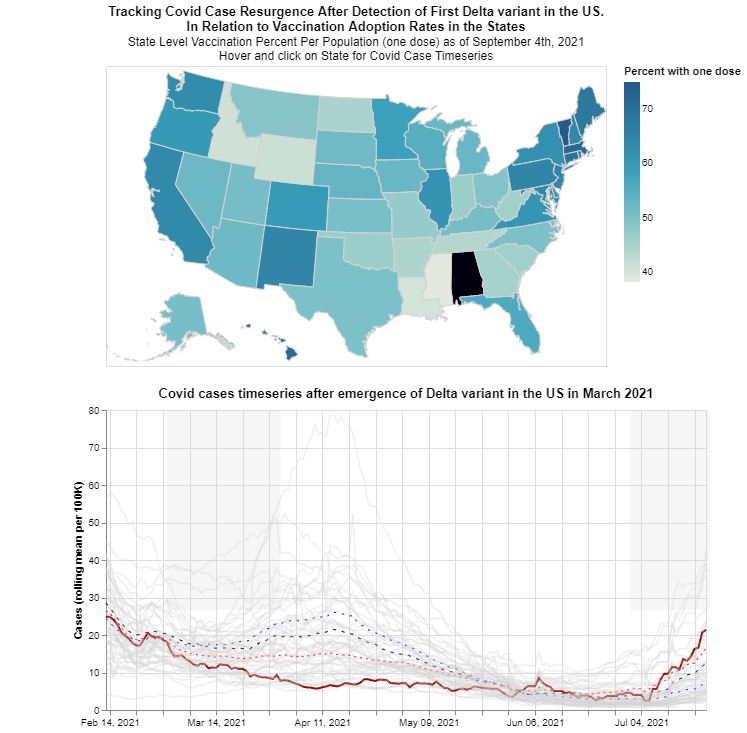

In [9]:
# Put the five layers into a chart and bind the data

vaccine_chart, us_timeseries, stayed_democrat_timeseries,\
stayed_republican_timeseries,state_cases_delta_chart,\
state_selectors, rules, tooltip_text1,\
tooltip_text2, tooltip_text3, tooltip_text4, tooltip_text5,\
points, rect_area, delta_rect_area = createCombinedVaccinationAndDeltaVariantTrend()

vaccine_chart & alt.layer(
    (state_cases_delta_chart + 
     us_timeseries + 
     stayed_democrat_timeseries +
     stayed_republican_timeseries+
     rect_area + delta_rect_area), 
     state_selectors, rules, tooltip_text1, 
      tooltip_text2, tooltip_text3, tooltip_text4, tooltip_text5,
    points
).properties(
    width=600, height=300
)

## Frequent and Infrequent Mask Usage by Political affiliation

Mask usage data was collected in a survey by New York Times (through a professional survey firm). The data was gathered from 250,000 people surveyed in a two week period in July 2020 (please see details in Appendix). The five choices offered: Never, Rarely, Sometimes, Frequently Always. The estimations of all five for every county, provided as a float adds up to 1.
This was binned into Not Frequent (Never, Rarely, Sometimes) and Infrequent (Frequently, Always) usage which for every county now adds up to 1. Binning is a common technique used to convert a quantitative data into a categorical value and this technique was once again applied to bin the estimates into ranges of Low, Medium and High chance of frequent and infrequent usage of masks.
 
The density plot of mask usage, shows the distribution of infrequent and frequent mask usage among counties (that the surveyed participant resides in) that voted Democrat or Republican.
We see that relatively, there is a higher probability of mask usage among the counties voting for Democrats over the Republicans.

To drill into the distribution, the spatial map can be studied at a lower granularity of each county. It also shows that CDC masking guidelines are better appreciated in the well-populated areas along the east and west urban coast of the US (irrespective of affiliation)-select Democrat/Republican - High Mask usage in Frequent mask usage chart. In the heartland, a lukewarm acceptance to the guidelines is observed - select Democrat/Republican Low mask usage in Infrequent mask usage chart. 


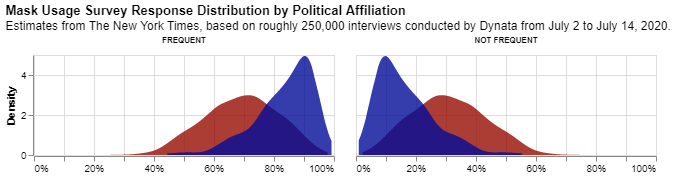

In [10]:
createMaskUsageDistributionChart()

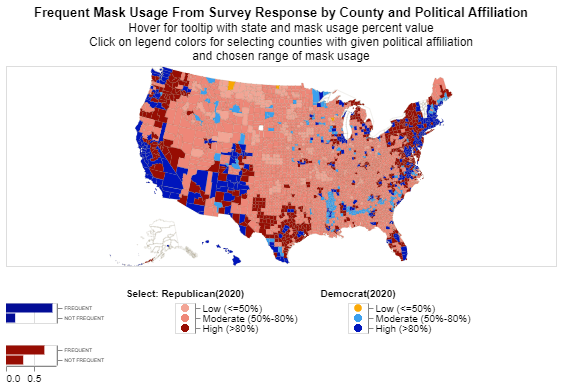

In [11]:
#createCombinedElectoralAndMaskUsageCharts().configure_view(strokeOpacity=0)
county_mask_chart, legend_republican, legend_democrat, average_mask_chart =\
createFreqCountyMaskUsageWithRanges('FREQUENT')
(
    ( county_mask_chart) &
    ( average_mask_chart | legend_republican | legend_democrat  
    ).resolve_scale(
                    color="independent"
                    )
)
  

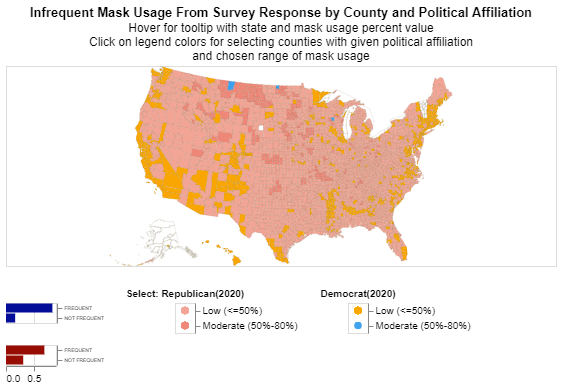

In [12]:
#createCombinedElectoralAndMaskUsageCharts().configure_view(strokeOpacity=0)
county_mask_chart, legend_republican, legend_democrat, average_mask_chart =\
createFreqCountyMaskUsageWithRanges('INFREQUENT')
(
    ( county_mask_chart) &
    ( average_mask_chart | legend_republican | legend_democrat  
    ).resolve_scale(
                    color="independent"
                    )
)
  